# Cluster Analysis of Iris Dataset


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

In [81]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


This data consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). It has four features from each sample: length and width of sepals and petals.

In [82]:
X = iris.data[:, :2]
y = iris.target

Ploting the scatter plot of the data

Text(0, 0.5, 'Sepal Width')

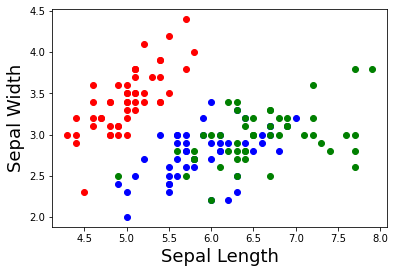

In [99]:
colors = ['red','blue','green']
n = X.shape[0]
for i in range(n):
    plt.scatter(X[i,0],X[i,1],c=colors[int(y[i])])
    
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

In [84]:
x = iris_df.iloc[:,[0,1,2,3]].values

finding the optimum no. of cluster

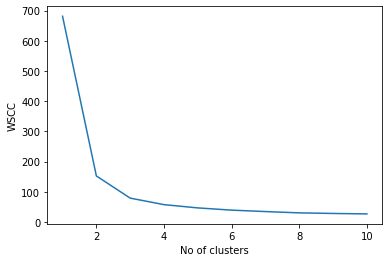

In [85]:
wscc=[]
for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++',max_iter=400,n_init=10,random_state=0)
    km.fit(x)
    wscc.append(km.inertia_)
    
#plotting the line graph to fing the elbow point
plt.plot(range(1,11),wscc)
plt.xlabel('No of clusters')
plt.ylabel('WSCC')
plt.show()

Optimum No. of clusters for problem is n_cluster=3

In [96]:
km = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans= km.fit_predict(x)

Scatter plot of clusters with centroids

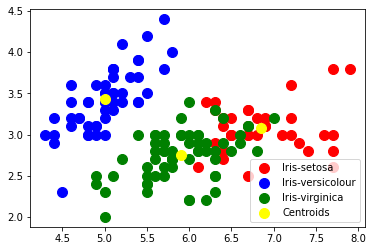

In [97]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()